In [17]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random as rnd
import yfinance as yf
from deap import algorithms, base, creator, tools

import warnings
warnings.filterwarnings("ignore")

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,TSLA,F,GE
Date,,,,
2021-01-04,127.002106,243.256668,7.234353,51.412853
2021-01-05,128.572311,245.036667,7.344736,52.886017
2021-01-06,124.244392,251.993332,7.506066,55.783199
2021-01-07,128.483994,272.013336,7.692869,55.341251
2021-01-08,129.592972,293.339996,7.641922,55.684982


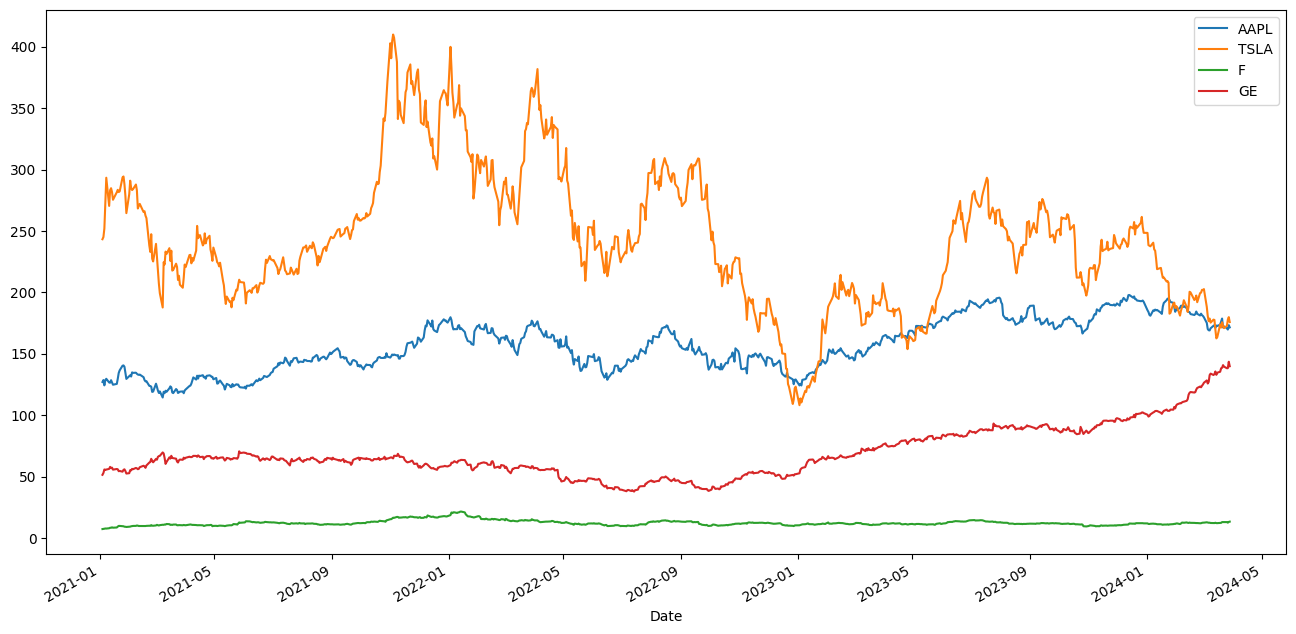

In [18]:
activos = ['AAPL', 'TSLA', 'F', 'GE']
fecha_inicio = '2021-01-01'
fecha_final = '2024-03-31'
datos = pd.DataFrame()
# datos = yf.download(activos, start=fecha_inicio, end=fecha_final)
# datos = pd.DataFrame((datos["Adj Close"]))
for i in activos:
    datos[i] = yf.download(i, start=fecha_inicio, end=fecha_final)["Adj Close"]
datos.plot(figsize= (16,8))
datos.head()

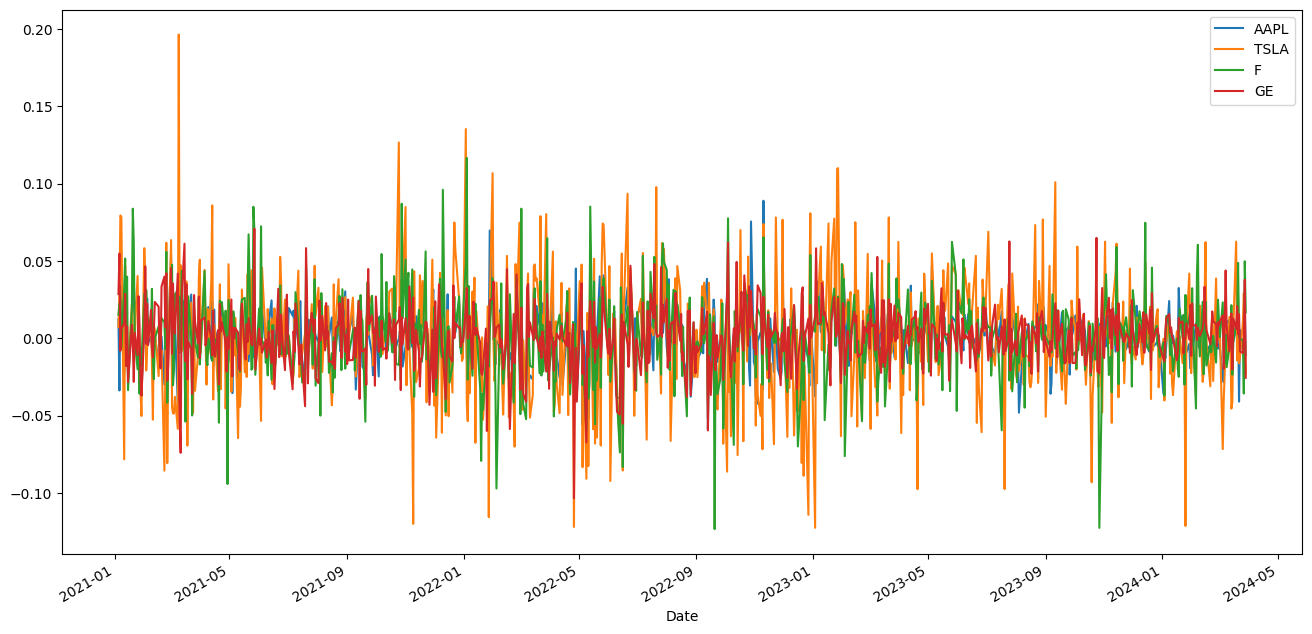

,AAPL,TSLA,F,GE
Date,,,,
2021-01-05,0.012364,0.007317,0.015258,0.028654
2021-01-06,-0.033661,0.028390,0.021965,0.054782
2021-01-07,0.034123,0.079447,0.024887,-0.007923
2021-01-08,0.008631,0.078403,-0.006623,0.006211
2021-01-11,-0.023249,-0.078214,0.033333,0.009700
...,...,...,...,...
2024-03-22,0.005310,-0.011515,-0.000774,-0.008435
2024-03-25,-0.008300,0.010537,-0.000775,-0.009478
2024-03-26,-0.006673,0.029195,-0.035659,0.000346


In [19]:
retorno_simple = datos.pct_change().dropna()
retorno_simple.plot(figsize = (16, 8))
plt.show()
retorno_simple

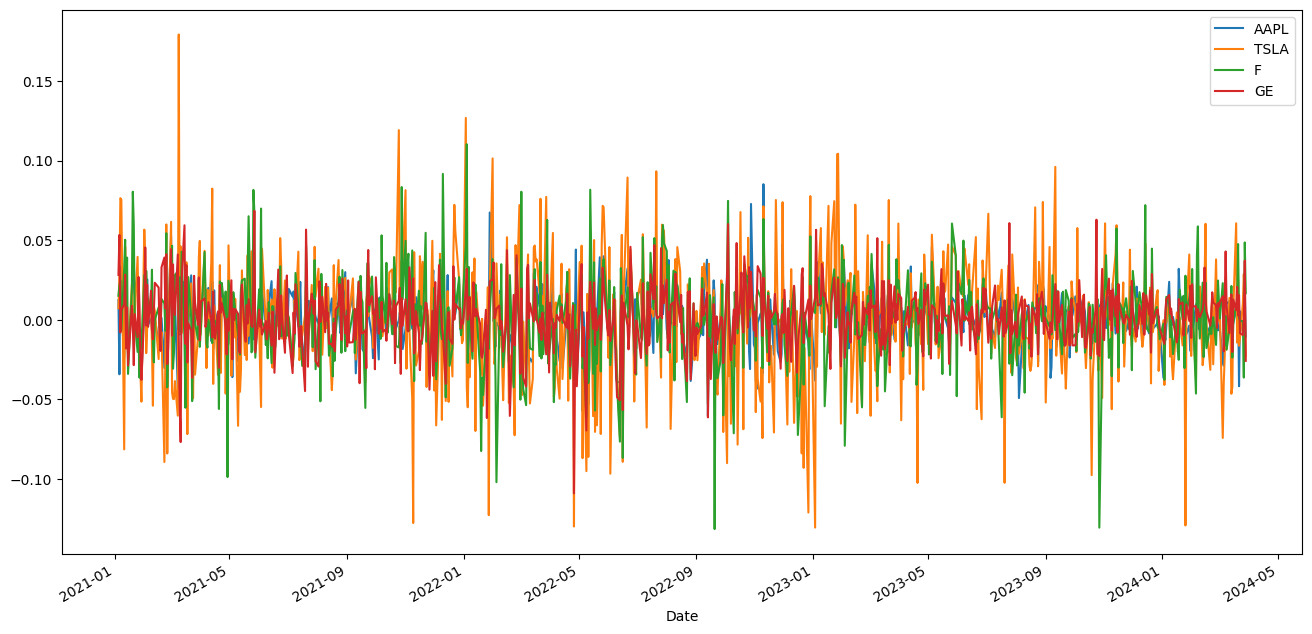

,AAPL,TSLA,F,GE
Date,,,,
2021-01-05,0.012288,0.007291,0.015143,0.028251
2021-01-06,-0.034241,0.027995,0.021728,0.053334
2021-01-07,0.033554,0.076448,0.024582,-0.007954
2021-01-08,0.008594,0.075481,-0.006645,0.006192
2021-01-11,-0.023523,-0.081442,0.032790,0.009654
...,...,...,...,...
2024-03-22,0.005296,-0.011582,-0.000774,-0.008471
2024-03-25,-0.008335,0.010482,-0.000775,-0.009523
2024-03-26,-0.006695,0.028777,-0.036310,0.000346


In [20]:
retorno_logaritmico = np.log(datos/datos.shift(1)).dropna()
retorno_logaritmico.plot(figsize = (16, 8))
plt.show()
retorno_logaritmico

In [21]:
def adaptabilidad(individual, ret_simple, ret_log):
    pesos = np.array(individual) / np.sum(individual)
    capacidad = 1000
    if np.sum(individual) <= capacidad:
        rentabilidad = np.dot((ret_simple.mean() * 252) , pesos)
        riesgo = np.sqrt(np.dot(np.transpose(pesos), np.dot((ret_log.cov() * 252), pesos)))
    else:
        rentabilidad = 0
        riesgo = 99999999

    return rentabilidad, riesgo,

# def adaptabilidad(individual):
#     rentabilidad = 0
#     riesgo = 0
#     for index, activo in retorno_simple.iterrows():
#         retorno_s = np.mean(activo) * 252
#         retorno_l = np.mean(np.log(activo/activo.shift(1)))
#         for i, individuo in enumerate(individual):
#             rentabilidad += (individuo/sum(individual) * retorno_s[i])
#             riesgo += (individuo**2 * np.cov(retorno_l)[i][i])

#     return rentabilidad, math.sqrt(riesgo)

# Contenedores

In [22]:
# Contenedor
toolbox = base.Toolbox()

# Declarar clase función de adaptabilidad
creator.create("FitnessMulti", base.Fitness, weights = (0.6,-1.0))

# Crear la clase individuo
creator.create("Individual", list, fitness = creator.FitnessMulti)

In [23]:
# Construir cromosomas bit
toolbox.register("attr_portafolio", rnd.randint, 100, 450)

# Construir el individuo
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_portafolio, n = len(activos))

#Crear población
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [24]:
individuo = toolbox.individual()
print(individuo)

poblacion = toolbox.population(n = 5)
print(poblacion)

[203, 366, 373, 362]
[[225, 392, 137, 444], [425, 306, 314, 149], [116, 249, 314, 127], [403, 163, 194, 436], [390, 184, 269, 369]]


In [25]:
ind = toolbox.individual()
print('Individuo a evaluar')
print(ind)
print(ind.fitness.valid)
ind.fitness.values = adaptabilidad(ind, retorno_simple, retorno_logaritmico)
print('Individuo evaluado')
print(ind)
print(ind.fitness.valid)
print(ind.fitness)
print(ind/np.sum(ind))

Individuo a evaluar
[101, 252, 208, 447]
False
Individuo evaluado
[101, 252, 208, 447]
True
(0.0, 99999999.0)
[0.10019841 0.25       0.20634921 0.44345238]


In [26]:
toolbox.register("select", tools.selRoulette)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=200, sigma = 1, indpb=0)
toolbox.register("evaluate", adaptabilidad, ret_simple=retorno_simple, ret_log=retorno_logaritmico)

In [27]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Promedio", np.mean)
stats.register("Desviación Estandar", np.std)
stats.register("Mínimo", np.min)
stats.register("Máximo", np.max)

In [28]:
population = toolbox.population(n = 1000)
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=1, mutpb=0.2, ngen=100, verbose=True, stats=stats)
print(logbook)

gen	nevals	Promedio	Desviación Estandar	Mínimo	Máximo
0  	1000  	3.41e+07	4.74045e+07        	0     	1e+08 
1  	1000  	1.11e+07	3.14132e+07        	0     	1e+08 
2  	1000  	6.3e+06 	2.42963e+07        	0     	1e+08 
3  	1000  	4.2e+06 	2.00589e+07        	0     	1e+08 
4  	1000  	2.05e+06	1.41703e+07        	0     	1e+08 
5  	1000  	2.15e+06	1.45044e+07        	0     	1e+08 
6  	1000  	1.45e+06	1.1954e+07         	0     	1e+08 
7  	1000  	1.4e+06 	1.1749e+07         	0     	1e+08 
8  	1000  	1.35e+06	1.15403e+07        	0     	1e+08 
9  	1000  	1.1e+06 	1.04302e+07        	0     	1e+08 
10 	1000  	650000  	8.03601e+06        	0     	1e+08 
11 	1000  	650000  	8.03601e+06        	0     	1e+08 
12 	1000  	650000  	8.03601e+06        	0     	1e+08 
13 	1000  	450000  	6.69309e+06        	0     	1e+08 
14 	1000  	600000  	7.72269e+06        	0     	1e+08 
15 	1000  	550000  	7.39578e+06        	0     	1e+08 
16 	1000  	400000  	6.31189e+06        	0     	1e+08 
17 	1000  	450000  	6.69309e

In [29]:
print('El individuo que maximiza la rentabilidad y minimza el riesgo es: ')
print(tools.selBest(population, 1)[0])

El individuo que maximiza la rentabilidad y minimza el riesgo es: 
[100, 101, 276, 413]


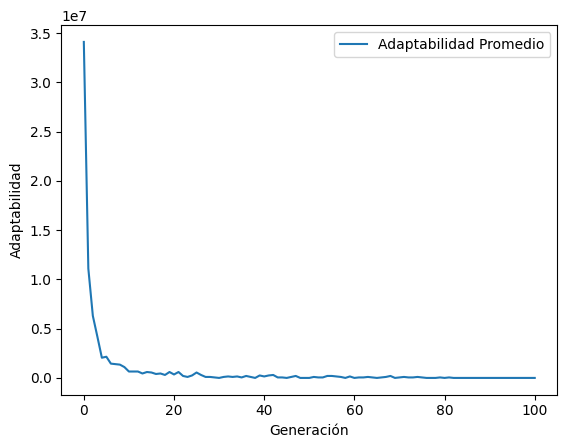

In [30]:
gen = logbook.select("gen")
avgs = logbook.select("Promedio")
plt.plot(gen, avgs, label = "Adaptabilidad Promedio")
plt.legend()
plt.xlabel("Generación")
plt.ylabel("Adaptabilidad")
plt.show()